# **Base Paper Implementation**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!unzip /content/gdrive/MyDrive/dataset/mitbih.zip

In [ ]:
pip install wfdb

In [ ]:
import sys
import os
import glob
import numpy as np
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

In [ ]:
print(os.getcwd())
def get_records():
    
    paths = glob.glob('mitbih/*.atr') 
    
    paths = [path[:-4] for path in paths]
    paths.sort()

    return paths

records = get_records()
print ('There are {} record files'.format(len(records)))
print (records)

/content
There are 48 record files
['mitbih/100', 'mitbih/101', 'mitbih/102', 'mitbih/103', 'mitbih/104', 'mitbih/105', 'mitbih/106', 'mitbih/107', 'mitbih/108', 'mitbih/109', 'mitbih/111', 'mitbih/112', 'mitbih/113', 'mitbih/114', 'mitbih/115', 'mitbih/116', 'mitbih/117', 'mitbih/118', 'mitbih/119', 'mitbih/121', 'mitbih/122', 'mitbih/123', 'mitbih/124', 'mitbih/200', 'mitbih/201', 'mitbih/202', 'mitbih/203', 'mitbih/205', 'mitbih/207', 'mitbih/208', 'mitbih/209', 'mitbih/210', 'mitbih/212', 'mitbih/213', 'mitbih/214', 'mitbih/215', 'mitbih/217', 'mitbih/219', 'mitbih/220', 'mitbih/221', 'mitbih/222', 'mitbih/223', 'mitbih/228', 'mitbih/230', 'mitbih/231', 'mitbih/232', 'mitbih/233', 'mitbih/234']


In [ ]:
def beat_annotations(annotation, type):
    
    
    good = [type] 
    ids = np.in1d(annotation.symbol, good)

    
    beats = annotation.sample[ids]

    return beats

In [ ]:
import wfdb

def signal_segmentation(sig, type, output_dir=''):
    count = 1
    signals, fields = wfdb.rdsamp(sig, channels = [0])
    ann = wfdb.rdann(sig, 'atr')
    imp_beats = beat_annotations(ann, type)
    beats = (ann.sample)
    for i in tqdm(imp_beats):
        beats = np.array(beats)
        index_i = np.where(beats == i) 
        j = index_i[0][0] 
        if(j!=0 and j!=(len(beats)-1)):
            # according to paper
            sig_start = beats[j-1] + 20
            sig_end = beats[j+1] - 20
            data = signals[sig_start:sig_end, 0]
            
            # Plot and save the beat
            fig = plt.figure(dpi=300, frameon=False, figsize=(1.0,0.5))
            plt.plot(data, linewidth=0.5)
            plt.xticks([]), plt.yticks([])
            for spine in plt.gca().spines.values():
                spine.set_visible(False)
            filename = output_dir + 'fig_{}_{}'.format(sig[-3:],count) + '.png'  
            fig.savefig(filename)
            plt.close()
            im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
            im_gray = cv2.copyMakeBorder(im_gray,75,75,0,0, cv2.BORDER_REPLICATE) 
            im_gray = cv2.resize(im_gray, (64,64), interpolation=cv2.INTER_LANCZOS4)
            cv2.imwrite(filename, im_gray)
            print('img writtten {}'.format(filename))
            count += 1
        print('img completed {}'.format(sig))

# **Extracting Normal Beats from ECG Signals**

In [ ]:
labels = ['N']
output_dirs = ['NOR/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[0:6]  
    
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)



# **Extracting Left Bundle Branch Beats from ECG Signals**

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['L']
output_dirs = ['LBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[0:10]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['L']
output_dirs = ['LBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[10:20]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['L']
output_dirs = ['LBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[20:30]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['L']
output_dirs = ['LBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[30:40]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['L']
output_dirs = ['LBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[40:48]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

# **Extracting Right Bundle Branch Beats from ECG Signals**

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['R']
output_dirs = ['RBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[0:10]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['R']
output_dirs = ['RBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[10:20]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['R']
output_dirs = ['RBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[20:30]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['R']
output_dirs = ['RBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[30:40]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['R']
output_dirs = ['RBBB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[40:48]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

# **Extracting Premature Ventricular Contraction Beats from ECG Signals**

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['V']
output_dirs = ['PVC/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[0:10]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['V']
output_dirs = ['PVC/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[10:20]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['V']
output_dirs = ['PVC/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[20:30]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['V']
output_dirs = ['PVC/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[30:40]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['V']
output_dirs = ['PVC/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[40:48]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

# **Extracting Paced Beats from ECG Signals**

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['/']
output_dirs = ['PB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[0:10]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['/']
output_dirs = ['PB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[10:20]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# creating database by segmentation of ecg beats into image

labels = ['/']
output_dirs = ['PB/']
for type, output_dir in zip(labels, output_dirs):
    result_dir = 'MIT-BIH_DATABASE/'+output_dir
    partial_records = records[30:40]  # 6 elememts out of 48 elements iteration due to RAM shortage, e.g. from records[0] to records[5] -- 6 elememts
    #print(partial_records)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)
    for r in tqdm(partial_records):
        signal_segmentation(r, type, output_dir=result_dir)

# no need to run this block anymore after data creation(beat segmentation / ECG to beat image conversion)

In [ ]:
# count the length of different directory inside dataset and plot pie chart function

def plot_pie_chart_of_data(data, labels, colors, figName_with_ext, figureSize=(10,10), center_white_circle_radius=0.7):
    plt.figure(figsize=figureSize)
    my_circle=plt.Circle((0,0), center_white_circle_radius, color='white')
    plt.pie(data, labels= labels, colors= colors, autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
    p.savefig(figName_with_ext, dpi=400, bbox_inches='tight')

Number of images in each directory=[8965, 8072, 7256, 7130, 7024] and total number of images=38447


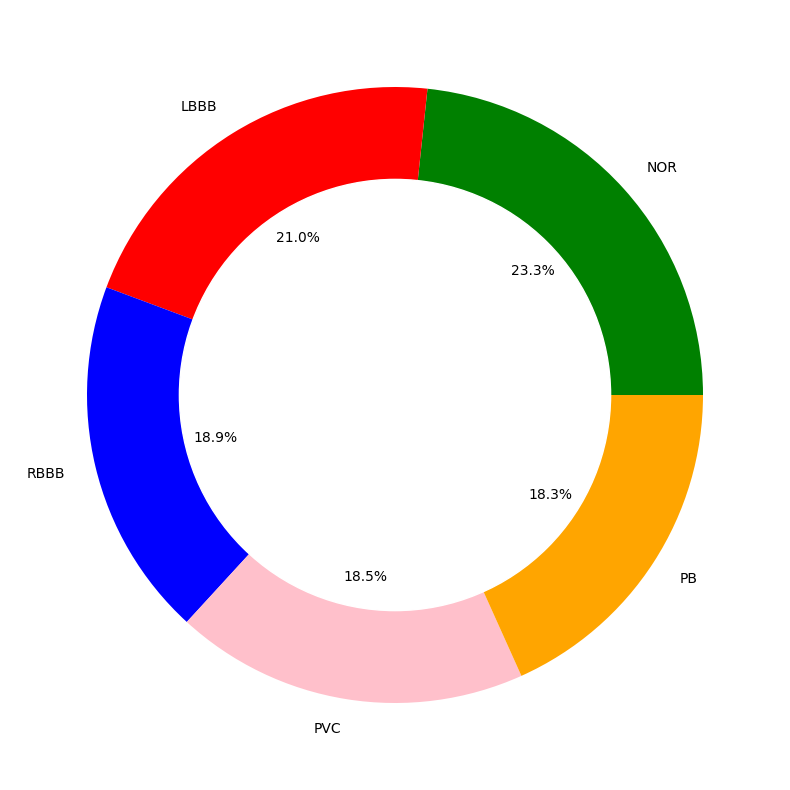

In [ ]:
# count the length of different directory inside dataset
Database_DIR = 'MIT-BIH_DATABASE/'
image_dirs = ['NOR/', 'LBBB/', 'RBBB/', 'PVC/', 'PB/']

no_of_files_in_dir=[]
for image_dir in image_dirs:
    path, dirs, files = next(os.walk(os.path.join(Database_DIR,image_dir)))
    no_of_files_in_dir.append(len(files)) 

print('Number of images in each directory={} and total number of images={}'.format(no_of_files_in_dir, sum(no_of_files_in_dir)))

labels = ['NOR', 'LBBB', 'RBBB', 'PVC', 'PB']
colors = ['green', 'red', 'blue', 'pink', 'orange']

plot_pie_chart_of_data(no_of_files_in_dir,labels,colors, 'data_distribution.png')

# plt.figure(figsize=(10,10))
# my_circle=plt.Circle((0,0), 0.7, color='white')
# plt.pie(no_of_files_in_dir, labels=['APC', 'LBBB', 'NOR', 'PAB', 'PVC', 'VEB', 'RBBB', 'VFE'], colors=['green','blue','red','skyblue','orange', 'yellow','magenta', 'cyan'],autopct='%1.1f%%')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.show()
# p.savefig('data_distribution.png', dpi=400, bbox_inches='tight')

In [ ]:
!zip -r /content/grays_images.zip MIT-BIH_DATABASE

# **Continue In Next File**